In [796]:
#Load the data From 1969-jan-1 to present

import pandas as pd
import numpy as np
data = pd.read_csv ("weather_data_berlin.csv",index_col = "DATE")
data.head(5)

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1960-01-01,GM000003319,"BERLIN DAHLEM, GM",0.02,0.0,NaN,46,38
1960-01-02,GM000003319,"BERLIN DAHLEM, GM",0.10,0.0,NaN,48,43
1960-01-03,GM000003319,"BERLIN DAHLEM, GM",0.00,0.0,NaN,45,37
1960-01-04,GM000003319,"BERLIN DAHLEM, GM",0.00,0.0,NaN,42,39
1960-01-05,GM000003319,"BERLIN DAHLEM, GM",0.41,0.0,NaN,46,39


In [797]:
#converting Temp from fahrenheite to celcius
data["TAVG"] = (data["TAVG"]-32)*(5/9)
data["TMAX"] = (data["TMAX"]-32)*(5/9)
data["TMIN"] = (data["TMIN"]-32)*(5/9)
data.head()

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1960-01-01,GM000003319,"BERLIN DAHLEM, GM",0.02,0.0,NaN,7.777778,3.333333
1960-01-02,GM000003319,"BERLIN DAHLEM, GM",0.10,0.0,NaN,8.888889,6.111111
1960-01-03,GM000003319,"BERLIN DAHLEM, GM",0.00,0.0,NaN,7.222222,2.777778
1960-01-04,GM000003319,"BERLIN DAHLEM, GM",0.00,0.0,NaN,5.555556,3.888889
1960-01-05,GM000003319,"BERLIN DAHLEM, GM",0.41,0.0,NaN,7.777778,3.888889


In [798]:
#preparing Data for Machine Learning. making sure data isn't missing

data.apply(pd.isnull).sum()/data.shape[0]



STATION    0.000000
NAME       0.000000
PRCP       0.000000
SNWD       0.000611
TAVG       0.679654
TMAX       0.000000
TMIN       0.000000
dtype: float64

In [799]:
#select core Values from data for prediction
#TMAX - Maximum temperature
#TAVG - Average Temperature.
#TMIN - Minimum temperature
#PRCP - Precipitation
#SNWD - Snow depth

berlin_weather = weather[["PRCP","SNWD","TAVG","TMAX","TMIN"]].copy()
berlin_weather.columns = ["precip","snow_depth" , "temp_avg","temp_max","temp_min"] #renaming parameters for convenience
berlin_weather.head(5)

,precip,snow_depth,temp_avg,temp_max,temp_min
DATE,,,,,
1960-01-01,0.02,0.0,NaN,7.777778,3.333333
1960-01-02,0.10,0.0,NaN,8.888889,6.111111
1960-01-03,0.00,0.0,NaN,7.222222,2.777778
1960-01-04,0.00,0.0,NaN,5.555556,3.888889
1960-01-05,0.41,0.0,NaN,7.777778,3.888889


In [800]:
#filling In Missing values
berlin_weather.apply(pd.isnull).sum()/berlin_weather.shape[0]


precip        0.000000
snow_depth    0.000611
temp_avg      0.679654
temp_max      0.000000
temp_min      0.000000
dtype: float64

In [801]:
berlin_weather["temp_avg"].value_counts()

 14.444444    229
 4.444444     220
 5.555556     216
 13.333333    210
 11.666667    208
             ... 
-17.777778      2
-16.111111      2
-17.222222      1
-13.888889      1
-14.444444      1
Name: temp_avg, Length: 79, dtype: int64

In [802]:
berlin_weather[pd.isnull(berlin_weather["temp_avg"])].head(5)#null temp-avg values 

,precip,snow_depth,temp_avg,temp_max,temp_min
DATE,,,,,
1960-01-01,0.02,0.0,NaN,7.777778,3.333333
1960-01-02,0.10,0.0,NaN,8.888889,6.111111
1960-01-03,0.00,0.0,NaN,7.222222,2.777778
1960-01-04,0.00,0.0,NaN,5.555556,3.888889
1960-01-05,0.41,0.0,NaN,7.777778,3.888889


In [803]:
berlin_weather[pd.notnull(berlin_weather["temp_avg"])].head(5) #based on non null temp_avg values , we can fill null by avg( temp_max & temp_min)


,precip,snow_depth,temp_avg,temp_max,temp_min
DATE,,,,,
1973-01-01,0.00,0.0,-3.333333,0.555556,-6.666667
1973-01-02,0.00,0.0,-5.000000,-1.666667,-7.777778
1973-01-03,0.01,0.0,-4.444444,0.555556,-8.888889
1973-01-04,0.00,0.0,0.000000,0.555556,-0.555556
1973-01-05,0.02,0.0,0.555556,1.666667,-1.666667


In [804]:
berlin_weather["temp_avg"].head(5)

DATE
1960-01-01   NaN
1960-01-02   NaN
1960-01-03   NaN
1960-01-04   NaN
1960-01-05   NaN
Name: temp_avg, dtype: float64

In [805]:
#filling the missing values with avg
berlin_weather["temp_avg"]=berlin_weather["temp_avg"].fillna((berlin_weather["temp_max"]+berlin_weather["temp_min"])/2)
berlin_weather["temp_avg"].head(5)


DATE
1960-01-01    5.555556
1960-01-02    7.500000
1960-01-03    5.000000
1960-01-04    4.722222
1960-01-05    5.833333
Name: temp_avg, dtype: float64

In [806]:
#now snow depth
berlin_weather[pd.isnull(berlin_weather["snow_depth"])].head(5)#null snow_depth values 


,precip,snow_depth,temp_avg,temp_max,temp_min
DATE,,,,,
1970-12-31,0.00,NaN,-5.833333,-2.222222,-9.444444
2008-10-13,0.02,NaN,12.777778,20.555556,5.000000
2008-10-24,0.00,NaN,7.222222,12.222222,2.222222
2009-03-04,0.00,NaN,4.166667,10.000000,-1.666667
2009-03-10,0.07,NaN,5.833333,8.333333,3.333333


In [807]:
berlin_weather["snow_depth"].value_counts().head(5)


0.0    20664
0.4      305
0.8      299
1.2      247
1.6      195
Name: snow_depth, dtype: int64

In [808]:
# as majority values of snow depth are "0" , and number of "NA" values are 0.6% , significantly less , i've decided to replace NA values with 0
berlin_weather["snow_depth"]=berlin_weather["snow_depth"].fillna(0)
berlin_weather["snow_depth"].value_counts().head(5)



0.0    20678
0.4      305
0.8      299
1.2      247
1.6      195
Name: snow_depth, dtype: int64

In [809]:
#checking Again , if any values are missing - hopefully no Missing values
berlin_weather.apply(pd.isnull).sum()/berlin_weather.shape[0]



precip        0.0
snow_depth    0.0
temp_avg      0.0
temp_max      0.0
temp_min      0.0
dtype: float64

In [810]:
#making sure all the data types are numeric
berlin_weather.dtypes


precip        float64
snow_depth    float64
temp_avg      float64
temp_max      float64
temp_min      float64
dtype: object

In [811]:
berlin_weather.index = pd.to_datetime(berlin_weather.index)
berlin_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='DATE', length=22919, freq=None)

<AxesSubplot:xlabel='DATE'>

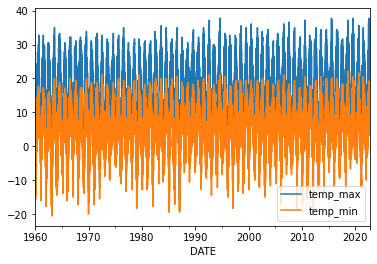

In [812]:
## Analysing weather data
berlin_weather[["temp_max","temp_min"]].plot()

<AxesSubplot:xlabel='DATE'>

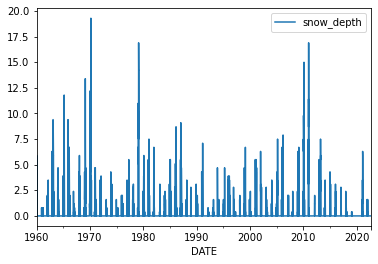

In [813]:
berlin_weather[["snow_depth"]].plot()

<AxesSubplot:xlabel='DATE'>

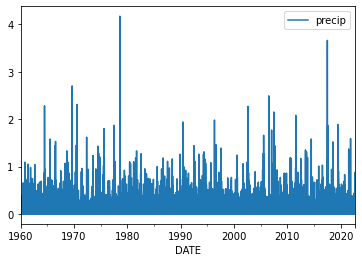

In [814]:
berlin_weather[["precip"]].plot()

In [815]:
#machine Learning 
#1) predict max_temp using historical data
# - create a target column for each day with next day's temparature
berlin_weather["target"] = berlin_weather.shift(-1)["temp_max"]
berlin_weather


,precip,snow_depth,temp_avg,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.02,0.0,5.555556,7.777778,3.333333,8.888889
1960-01-02,0.10,0.0,7.500000,8.888889,6.111111,7.222222
1960-01-03,0.00,0.0,5.000000,7.222222,2.777778,5.555556
1960-01-04,0.00,0.0,4.722222,5.555556,3.888889,7.777778
1960-01-05,0.41,0.0,5.833333,7.777778,3.888889,7.222222
...,...,...,...,...,...,...
2022-09-26,0.02,0.0,13.055556,16.666667,9.444444,12.777778
2022-09-27,0.16,0.0,10.000000,12.777778,7.222222,12.222222
2022-09-28,0.00,0.0,9.166667,12.222222,6.111111,14.444444


In [816]:
# delete the last row , as it has null target value
berlin_weather = berlin_weather.iloc[:-1].copy()
berlin_weather

,precip,snow_depth,temp_avg,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.02,0.0,5.555556,7.777778,3.333333,8.888889
1960-01-02,0.10,0.0,7.500000,8.888889,6.111111,7.222222
1960-01-03,0.00,0.0,5.000000,7.222222,2.777778,5.555556
1960-01-04,0.00,0.0,4.722222,5.555556,3.888889,7.777778
1960-01-05,0.41,0.0,5.833333,7.777778,3.888889,7.222222
...,...,...,...,...,...,...
2022-09-25,0.00,0.0,14.722222,18.888889,10.555556,16.666667
2022-09-26,0.02,0.0,13.055556,16.666667,9.444444,12.777778
2022-09-27,0.16,0.0,10.000000,12.777778,7.222222,12.222222


In [817]:
#use ridge regression  , which minimises the overfittig from sklearn
from sklearn.linear_model import Ridge
reg = Ridge(alpha = .1)

In [818]:
predictors = ["precip","temp_max","temp_min"]

In [819]:
train = berlin_weather.loc[:"2022-08-31"] #to train the model


In [820]:
test = berlin_weather.loc["2022-09-01":]#to test the model

In [821]:
reg.fit(train[predictors],train["target"])
berlin_weather.fillna(0)

,precip,snow_depth,temp_avg,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.02,0.0,5.555556,7.777778,3.333333,8.888889
1960-01-02,0.10,0.0,7.500000,8.888889,6.111111,7.222222
1960-01-03,0.00,0.0,5.000000,7.222222,2.777778,5.555556
1960-01-04,0.00,0.0,4.722222,5.555556,3.888889,7.777778
1960-01-05,0.41,0.0,5.833333,7.777778,3.888889,7.222222
...,...,...,...,...,...,...
2022-09-25,0.00,0.0,14.722222,18.888889,10.555556,16.666667
2022-09-26,0.02,0.0,13.055556,16.666667,9.444444,12.777778
2022-09-27,0.16,0.0,10.000000,12.777778,7.222222,12.222222


In [822]:
berlin_weather.replace([np.inf, -np.inf], np.nan, inplace=True)
berlin_weather.dropna(inplace=True)

In [823]:
np.any(np.isnan(core_weather))

False

In [824]:
np.any(np.isfinite(berlin_weather))

True

In [825]:
berlin_weather.replace([np.inf, -np.inf], np.nan, inplace=True)
berlin_weather.dropna(inplace=True)

In [826]:
np.any(np.isfinite(berlin_weather))

True

In [827]:
ds = berlin_weather.isin([np.inf , -np.inf])
berlin_weather.round(decimals = 3)

,precip,snow_depth,temp_avg,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.02,0.0,5.556,7.778,3.333,8.889
1960-01-02,0.10,0.0,7.500,8.889,6.111,7.222
1960-01-03,0.00,0.0,5.000,7.222,2.778,5.556
1960-01-04,0.00,0.0,4.722,5.556,3.889,7.778
1960-01-05,0.41,0.0,5.833,7.778,3.889,7.222
...,...,...,...,...,...,...
2022-09-25,0.00,0.0,14.722,18.889,10.556,16.667
2022-09-26,0.02,0.0,13.056,16.667,9.444,12.778
2022-09-27,0.16,0.0,10.000,12.778,7.222,12.222


In [828]:
predictions = reg.predict(test[predictors])

In [829]:
from sklearn.metrics import mean_absolute_error #substracts actuals from predictions , takes the absolute value and then find the average of that across all predictions

mean_absolute_error (test["target"],predictions)

1.9046107441910052

In [830]:
#to see actuals and predictions side by side
combined  = pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis = 1)
combined.columns = ["actuals","predictions"]



,actuals,predictions
DATE,,
2022-09-01,22.222222,21.484802
2022-09-02,22.222222,21.790498
2022-09-03,25.000000,21.849745
2022-09-04,25.000000,24.444673
2022-09-05,23.333333,24.444673
2022-09-06,25.555556,23.053608
2022-09-07,17.222222,24.987357
2022-09-08,23.333333,16.767308
2022-09-09,23.333333,22.935114


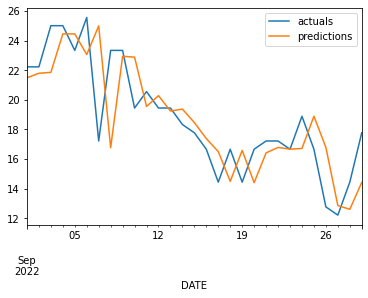

In [831]:
combined.plot()
combined

In [832]:
reg.coef_

array([-2.18667503,  0.87018706,  0.10664473])

In [833]:
#create a function to prediction

def predict_high_temp (predictors , berlin_weather,reg):
    train = berlin_weather.loc[:"2022-08-31"]
    test = berlin_weather.loc["2022-09-01":]
    reg.fit(train[predictors],train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error (test["target"],predictions)
    combined  = pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis = 1)
    combined.columns = ["actuals","predictions"] 
    return error , combined
    

In [834]:
error

1.9452075552118422

<AxesSubplot:xlabel='DATE'>

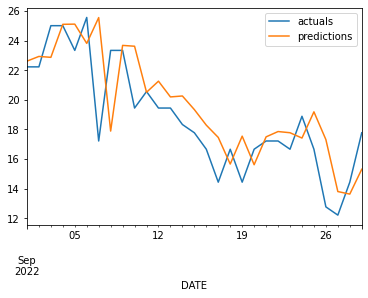

In [852]:
combined.plot()

In [853]:
combined

,actuals,predictions
DATE,,
2022-09-01,22.222222,22.608553
2022-09-02,22.222222,22.926346
2022-09-03,25.000000,22.864977
2022-09-04,25.000000,25.092016
2022-09-05,23.333333,25.104407
2022-09-06,25.555556,23.805313
2022-09-07,17.222222,25.545816
2022-09-08,23.333333,17.891281
2022-09-09,23.333333,23.670319


In [835]:
#ading in rolling means , mean of the previous 30 days

In [836]:
berlin_weather["mean_prev_30_Days"] = berlin_weather [ "temp_max"].rolling(30).mean()
berlin_weather

,precip,snow_depth,temp_avg,temp_max,temp_min,target,mean_prev_30_Days
DATE,,,,,,,
1960-01-01,0.02,0.0,5.555556,7.777778,3.333333,8.888889,NaN
1960-01-02,0.10,0.0,7.500000,8.888889,6.111111,7.222222,NaN
1960-01-03,0.00,0.0,5.000000,7.222222,2.777778,5.555556,NaN
1960-01-04,0.00,0.0,4.722222,5.555556,3.888889,7.777778,NaN
1960-01-05,0.41,0.0,5.833333,7.777778,3.888889,7.222222,NaN
...,...,...,...,...,...,...,...
2022-09-25,0.00,0.0,14.722222,18.888889,10.555556,16.666667,20.129630
2022-09-26,0.02,0.0,13.055556,16.666667,9.444444,12.777778,19.907407
2022-09-27,0.16,0.0,10.000000,12.777778,7.222222,12.222222,19.611111


In [837]:
#how diffrent is monthly avg temp to the temp in a given day , it will help the algorithem make better predictions.
#EX - if a day has a very high temp compared to avg , algo will know abpurt it
berlin_weather ["month_day_max"] = berlin_weather["mean_prev_30_Days"] / berlin_weather [ "temp_max"]

In [838]:
#ratio between the maximum temparature and minimum temparature 
berlin_weather["max_min"] = berlin_weather["temp_max"] / berlin_weather["temp_min"]

In [839]:
#lets use the updated predictors to make better prediction
predictors = ["precip","temp_max","temp_min","mean_prev_30_Days","month_day_max","max_min"]

In [840]:
#removing the first 30 days data , as the mean-prev_30-days data for these days are missing 
berlin_weather = berlin_weather.iloc[30:,:].copy()
berlin_weather.apply(pd.isnull).sum()/berlin_weather.shape[0]

precip               0.0
snow_depth           0.0
temp_avg             0.0
temp_max             0.0
temp_min             0.0
target               0.0
mean_prev_30_Days    0.0
month_day_max        0.0
max_min              0.0
dtype: float64

In [841]:
#checking if any values are infinity and limiting decimal values to 3
ds = berlin_weather.isin([np.inf , -np.inf])
berlin_weather.round(decimals = 3)

,precip,snow_depth,temp_avg,temp_max,temp_min,target,mean_prev_30_Days,month_day_max,max_min
DATE,,,,,,,,,
1960-01-31,0.00,0.0,-3.333,-1.111,-5.556,-2.778,2.611,-2.350,0.200
1960-02-01,0.00,0.0,-5.556,-2.778,-8.333,-3.333,2.222,-0.800,0.333
1960-02-02,0.00,0.0,-6.944,-3.333,-10.556,-2.222,1.870,-0.561,0.316
1960-02-03,0.00,0.0,-6.389,-2.222,-10.556,-1.667,1.611,-0.725,0.211
1960-02-04,0.03,0.0,-4.167,-1.667,-6.667,-3.333,1.296,-0.778,0.250
...,...,...,...,...,...,...,...,...,...
2022-09-25,0.00,0.0,14.722,18.889,10.556,16.667,20.130,1.066,1.789
2022-09-26,0.02,0.0,13.056,16.667,9.444,12.778,19.907,1.194,1.765
2022-09-27,0.16,0.0,10.000,12.778,7.222,12.222,19.611,1.535,1.769


In [842]:
np.any(np.isnan(berlin_weather))

False

In [843]:
np.any(np.isfinite(berlin_weather))

True

In [844]:
#there are infinity values somewhere in data , hence droping them for error free code. replace inf with NAN and drop
berlin_weather.replace([np.inf, -np.inf], np.nan, inplace=True)
berlin_weather.dropna(inplace=True)


In [845]:
#reduced error from 4.5 to 4.3
error , combined = create_prediction(predictors, berlin_weather , reg)
error

1.9452075552118422

<AxesSubplot:xlabel='DATE'>

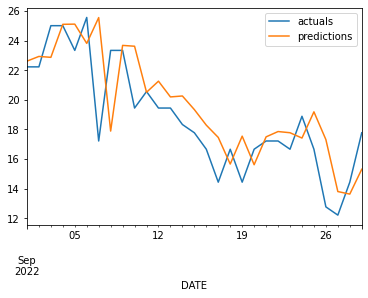

In [846]:
combined.plot()

In [847]:
error

1.9452075552118422

In [848]:
combined

,actuals,predictions
DATE,,
2022-09-01,22.222222,22.608553
2022-09-02,22.222222,22.926346
2022-09-03,25.000000,22.864977
2022-09-04,25.000000,25.092016
2022-09-05,23.333333,25.104407
2022-09-06,25.555556,23.805313
2022-09-07,17.222222,25.545816
2022-09-08,23.333333,17.891281
2022-09-09,23.333333,23.670319


In [849]:
#adding more predictors 
#average monthly temparature ,
#core_weather["monthly_avg"]= core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
#core_weather

In [850]:
reg.coef_

array([-2.24639624,  0.78602712,  0.03697383,  0.16763131, -0.00888018,
        0.01321103])

In [851]:
berlin_weather.corr()["target"]

precip              -0.000629
snow_depth          -0.335542
temp_avg             0.930104
temp_max             0.940058
temp_min             0.864232
target               1.000000
mean_prev_30_Days    0.847277
month_day_max        0.006549
max_min              0.154143
Name: target, dtype: float64